Install and Import Required Libraries



In [3]:
!pip install scikit-learn matplotlib seaborn tensorflow

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import models as keras_models
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
import time
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU Available: []


Load and Preprocess MNIST Data

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Original Training set size: {X_train.shape}")
print(f"Original Test set size: {X_test.shape}")

# for mlp
X_train_flat = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# For CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("\nData shapes:")
print(f"X_train_flat: {X_train_flat.shape}")
print(f"X_train_cnn: {X_train_cnn.shape}")
print(f"y_train_cat: {y_train_cat.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original Training set size: (60000, 28, 28)
Original Test set size: (10000, 28, 28)

Data shapes:
X_train_flat: (60000, 784)
X_train_cnn: (60000, 28, 28, 1)
y_train_cat: (60000, 10)


Visualize Sample MNIST Images

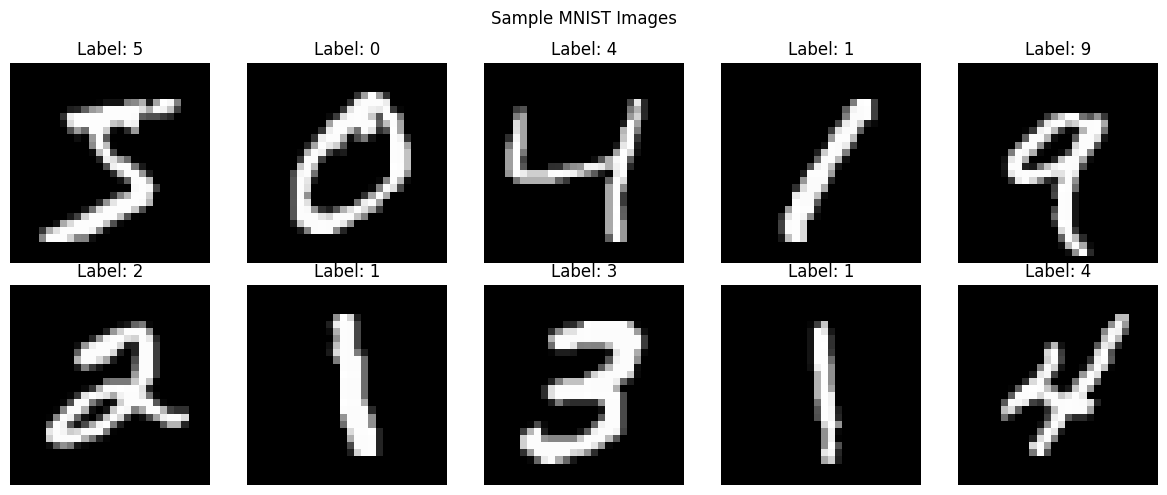

In [5]:
# Visualize the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

*3.1 Using MLP*

Build and Train MLP Model

In [23]:
def build_mlp():
    model = keras.models.Sequential([
        layers.Dense(30, activation='relu', input_shape=(784,), name='hidden_1'),
        layers.Dense(20, activation='relu', name='hidden_2'),
        layers.Dense(10, activation='softmax', name='output')
    ])
    return model

mlp_model = build_mlp()
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

Train MLP Model

In [7]:
print("Training MLP model...")
history = mlp_model.fit(
    X_train_flat, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

test_loss, test_acc = mlp_model.evaluate(X_test_flat, y_test_cat, verbose=0)
print(f"\nMLP Test Accuracy: {test_acc:.4f}")

Training MLP model...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6798 - loss: 1.0505 - val_accuracy: 0.9345 - val_loss: 0.2316
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9272 - loss: 0.2582 - val_accuracy: 0.9537 - val_loss: 0.1721
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9407 - loss: 0.2039 - val_accuracy: 0.9587 - val_loss: 0.1516
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9511 - loss: 0.1686 - val_accuracy: 0.9610 - val_loss: 0.1407
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9539 - loss: 0.1545 - val_accuracy: 0.9612 - val_loss: 0.1339
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1306 - val_accuracy: 0.9638 - val_loss: 0.1274
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1217 - val_accuracy: 0.9647 - val_loss: 0.1230
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1

Plot Training History

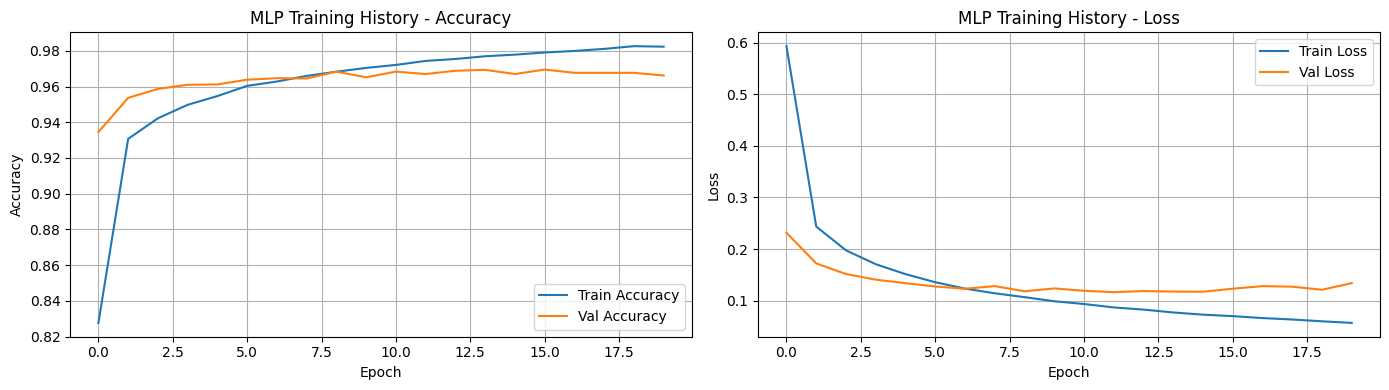

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('MLP Training History - Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('MLP Training History - Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Train Random Forest Baseline

In [9]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_flat, y_train)

rf_pred = rf_model.predict(X_test_flat)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")

Training Random Forest...
Random Forest Accuracy: 0.9704
Random Forest F1-Score: 0.9704


Train Logistic Regression Baseline

In [10]:
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_flat, y_train)

lr_pred = lr_model.predict(X_test_flat)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression F1-Score: {lr_f1:.4f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9260
Logistic Regression F1-Score: 0.9258


MLP Predictions and Metrics

In [11]:
mlp_pred_probs = mlp_model.predict(X_test_flat, verbose=0)
mlp_pred = np.argmax(mlp_pred_probs, axis=1)

mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')

print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print(f"MLP F1-Score: {mlp_f1:.4f}")

MLP Accuracy: 0.9633
MLP F1-Score: 0.9633


Compare All Models


MODEL COMPARISON
              Model  Accuracy  F1-Score
                MLP    0.9633  0.963322
      Random Forest    0.9704  0.970372
Logistic Regression    0.9260  0.925827


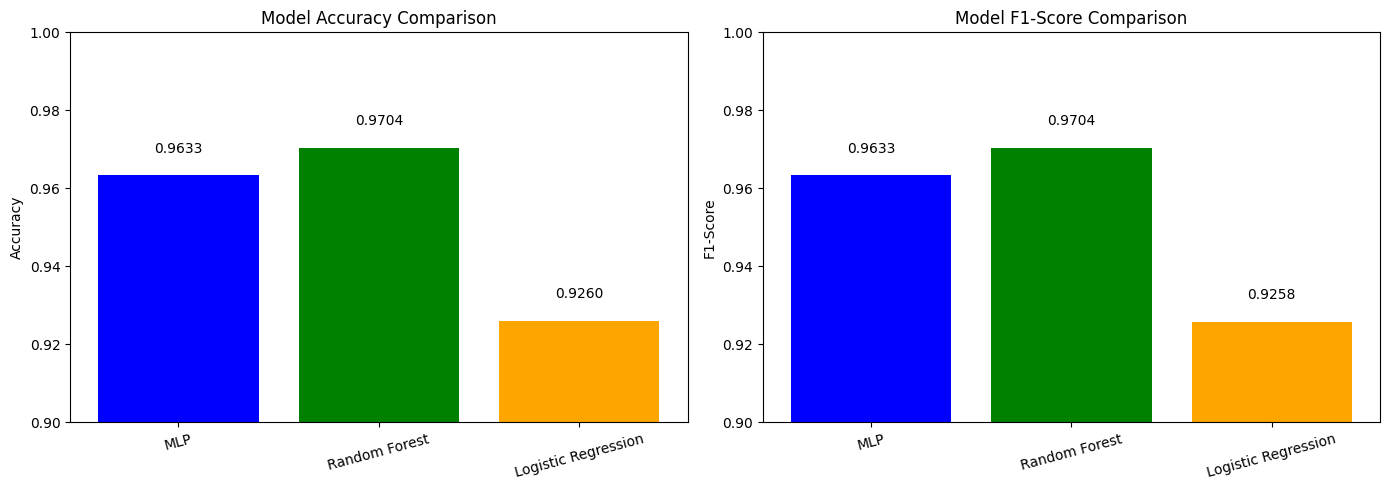

In [12]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [mlp_accuracy, rf_accuracy, lr_accuracy],
    'F1-Score': [mlp_f1, rf_f1, lr_f1]
})

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

models = comparison_df['Model']
x_pos = np.arange(len(models))

ax1.bar(x_pos, comparison_df['Accuracy'], color=['blue', 'green', 'orange'])
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15)
ax1.set_ylim([0.9, 1.0])
for i, v in enumerate(comparison_df['Accuracy']):
    ax1.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

ax2.bar(x_pos, comparison_df['F1-Score'], color=['blue', 'green', 'orange'])
ax2.set_ylabel('F1-Score')
ax2.set_title('Model F1-Score Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=15)
ax2.set_ylim([0.9, 1.0])
for i, v in enumerate(comparison_df['F1-Score']):
    ax2.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Confusion Matrices

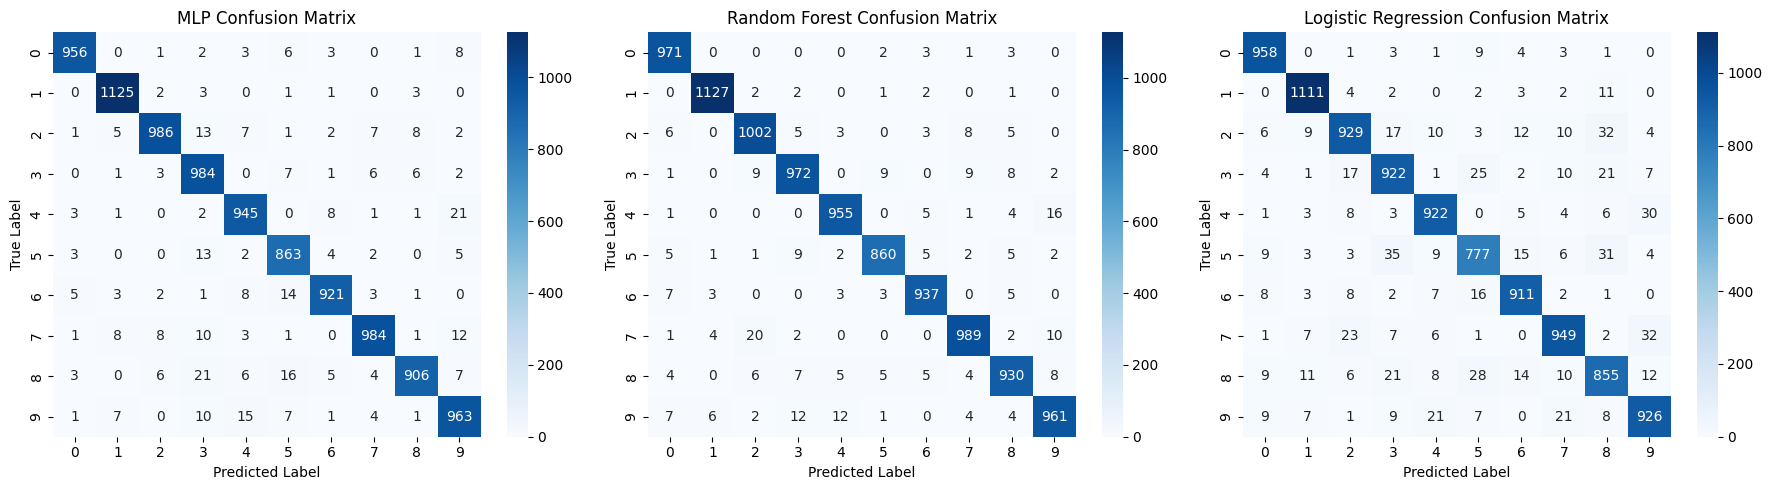

In [13]:
cm_mlp = confusion_matrix(y_test, mlp_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_lr = confusion_matrix(y_test, lr_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_cm = [('MLP', cm_mlp), ('Random Forest', cm_rf), ('Logistic Regression', cm_lr)]

for ax, (name, cm) in zip(axes, models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

Analyze Misclassifications


Total Misclassifications (MLP): 367
Misclassification Rate: 3.67%


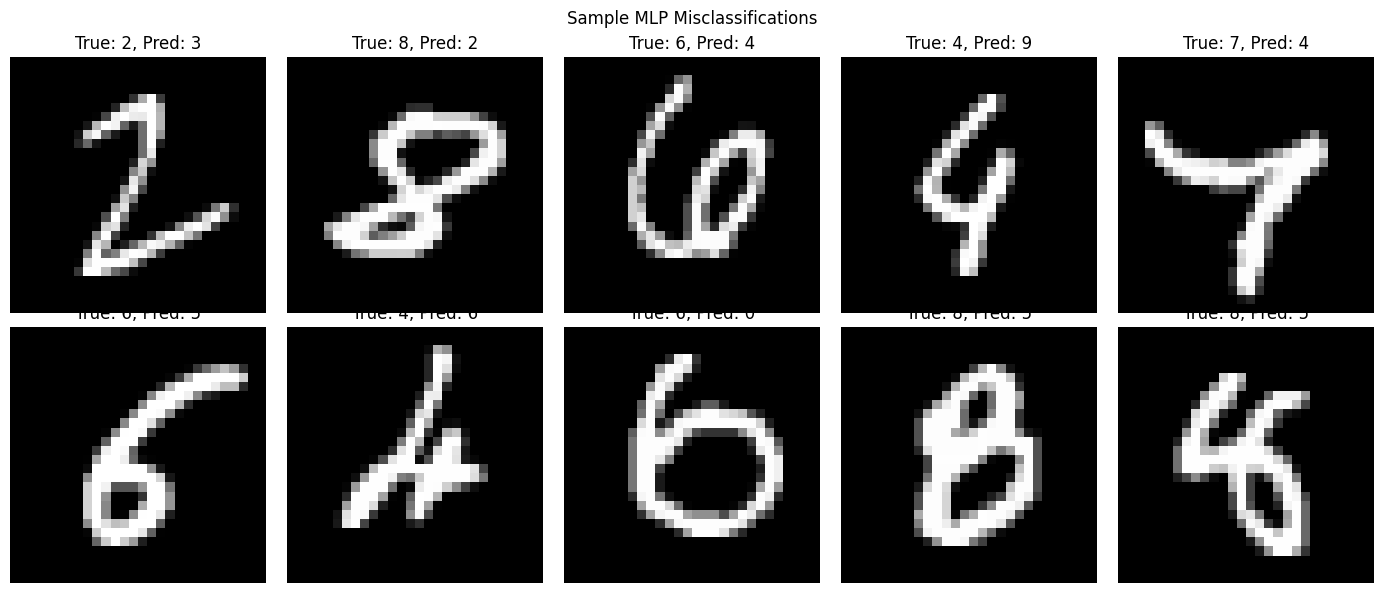


Most Common Misclassification Pairs:
  True: 4 → Predicted: 9 | Count: 21
  True: 8 → Predicted: 3 | Count: 21
  True: 8 → Predicted: 5 | Count: 16
  True: 9 → Predicted: 4 | Count: 15
  True: 6 → Predicted: 5 | Count: 14
  True: 2 → Predicted: 3 | Count: 13
  True: 5 → Predicted: 3 | Count: 13
  True: 7 → Predicted: 9 | Count: 12
  True: 7 → Predicted: 3 | Count: 10
  True: 9 → Predicted: 3 | Count: 10


In [14]:
misclassified_idx = np.where(mlp_pred != y_test)[0]
print(f"\nTotal Misclassifications (MLP): {len(misclassified_idx)}")
print(f"Misclassification Rate: {len(misclassified_idx)/len(y_test)*100:.2f}%")

# some misclassified examples
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_idx):
        idx = misclassified_idx[i]
        ax.imshow(X_test[idx], cmap='gray')
        ax.set_title(f'True: {y_test[idx]}, Pred: {mlp_pred[idx]}')
        ax.axis('off')
plt.suptitle('Sample MLP Misclassifications')
plt.tight_layout()
plt.show()

# Most confused pairs
print("\nMost Common Misclassification Pairs:")
misclass_pairs = {}
for i in misclassified_idx:
    pair = (y_test[i], mlp_pred[i])
    misclass_pairs[pair] = misclass_pairs.get(pair, 0) + 1

sorted_pairs = sorted(misclass_pairs.items(), key=lambda x: x[1], reverse=True)[:10]
for (true_label, pred_label), count in sorted_pairs:
    print(f"  True: {true_label} → Predicted: {pred_label} | Count: {count}")

Extract Embeddings from Trained MLP

In [20]:
embedding_model_trained = keras.models.Model(
    inputs=mlp_model.inputs, # Use .inputs instead of .input for a list of inputs
    outputs=mlp_model.get_layer('hidden_2').output
)

print("Extracting embeddings from trained MLP...")
embeddings_trained = embedding_model_trained.predict(X_test_flat, verbose=0)
print(f"Embeddings shape: {embeddings_trained.shape}")

Extracting embeddings from trained MLP...
Embeddings shape: (10000, 20)


Create and Extract Embeddings from Untrained MLP

In [25]:
mlp_untrained = build_mlp()

embedding_model_untrained = keras.models.Model(
    inputs=mlp_untrained.layers[0].input,
    outputs=mlp_untrained.get_layer('hidden_2').output
)

print("Extracting embeddings from untrained MLP...")
embeddings_untrained = embedding_model_untrained.predict(X_test_flat, verbose=0)
print(f"Embeddings shape: {embeddings_untrained.shape}")

Extracting embeddings from untrained MLP...
Embeddings shape: (10000, 20)


t-SNE Visualization - Trained vs Untrained MLP

In [26]:
print("Performing t-SNE on trained embeddings...")
tsne_trained = TSNE(n_components=2, random_state=42, perplexity=30.0, n_iter=300)
embeddings_2d_trained = tsne_trained.fit_transform(embeddings_trained)

print("Performing t-SNE on untrained embeddings...")
tsne_untrained = TSNE(n_components=2, random_state=42, perplexity=30.0, n_iter=300)
embeddings_2d_untrained = tsne_untrained.fit_transform(embeddings_untrained)

print("t-SNE completed.")

Performing t-SNE on trained embeddings...
Performing t-SNE on untrained embeddings...
t-SNE completed.


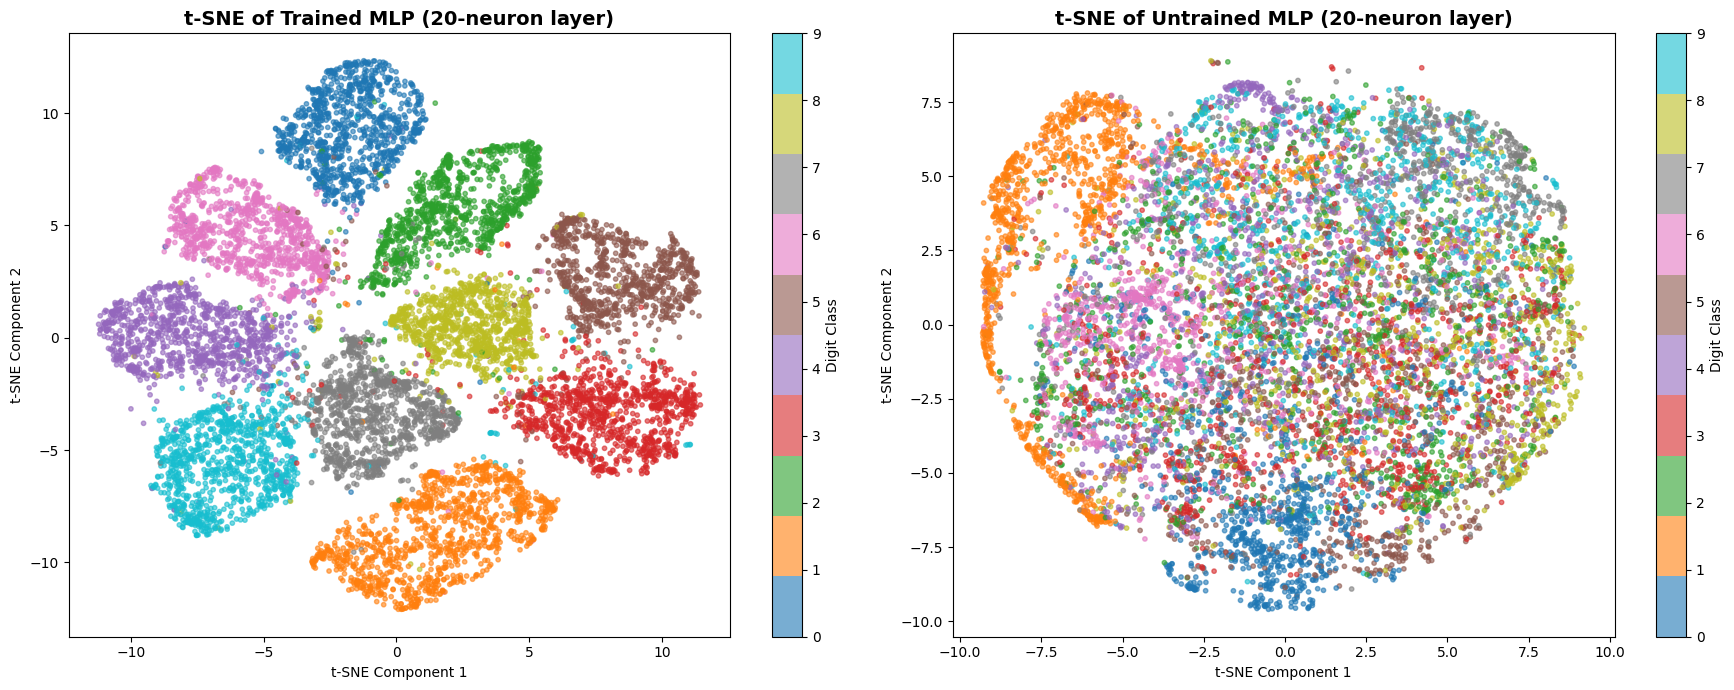


Observations:
- Trained model: Clear cluster separation for different digits
- Untrained model: Random, overlapping clusters with no clear separation


In [27]:
# Plot t-SNE visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Trained model
scatter1 = ax1.scatter(embeddings_2d_trained[:, 0], embeddings_2d_trained[:, 1],
                       c=y_test, cmap='tab10', alpha=0.6, s=10)
ax1.set_title('t-SNE of Trained MLP (20-neuron layer)', fontsize=14, fontweight='bold')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=range(10))
cbar1.set_label('Digit Class')

# Untrained model
scatter2 = ax2.scatter(embeddings_2d_untrained[:, 0], embeddings_2d_untrained[:, 1],
                       c=y_test, cmap='tab10', alpha=0.6, s=10)
ax2.set_title('t-SNE of Untrained MLP (20-neuron layer)', fontsize=14, fontweight='bold')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
cbar2 = plt.colorbar(scatter2, ax=ax2, ticks=range(10))
cbar2.set_label('Digit Class')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Trained model: Clear cluster separation for different digits")
print("- Untrained model: Random, overlapping clusters with no clear separation")

Load and Preprocess Fashion-MNIST

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fashion-MNIST Test set size: (10000, 28, 28)


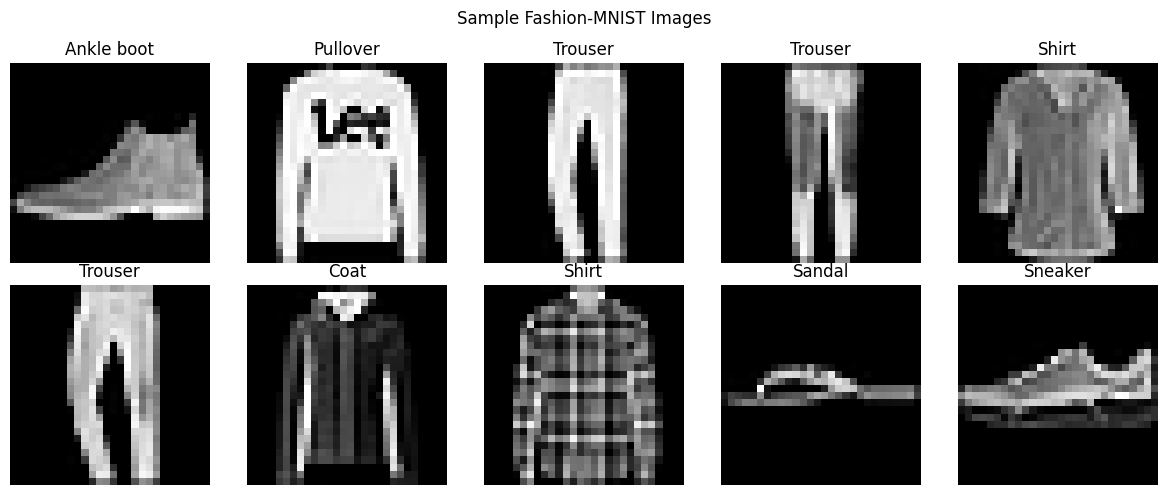

In [29]:
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()

print(f"Fashion-MNIST Test set size: {X_fashion_test.shape}")

X_fashion_test_flat = X_fashion_test.reshape(X_fashion_test.shape[0], -1).astype('float32') / 255.0

fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_fashion_test[i], cmap='gray')
    ax.set_title(f'{fashion_class_names[y_fashion_test[i]]}')
    ax.axis('off')
plt.suptitle('Sample Fashion-MNIST Images')
plt.tight_layout()
plt.show()

Test MLP on Fashion-MNIST

Testing MLP trained on MNIST with Fashion-MNIST data...

MLP on Fashion-MNIST:
Accuracy: 0.0931
F1-Score: 0.0180


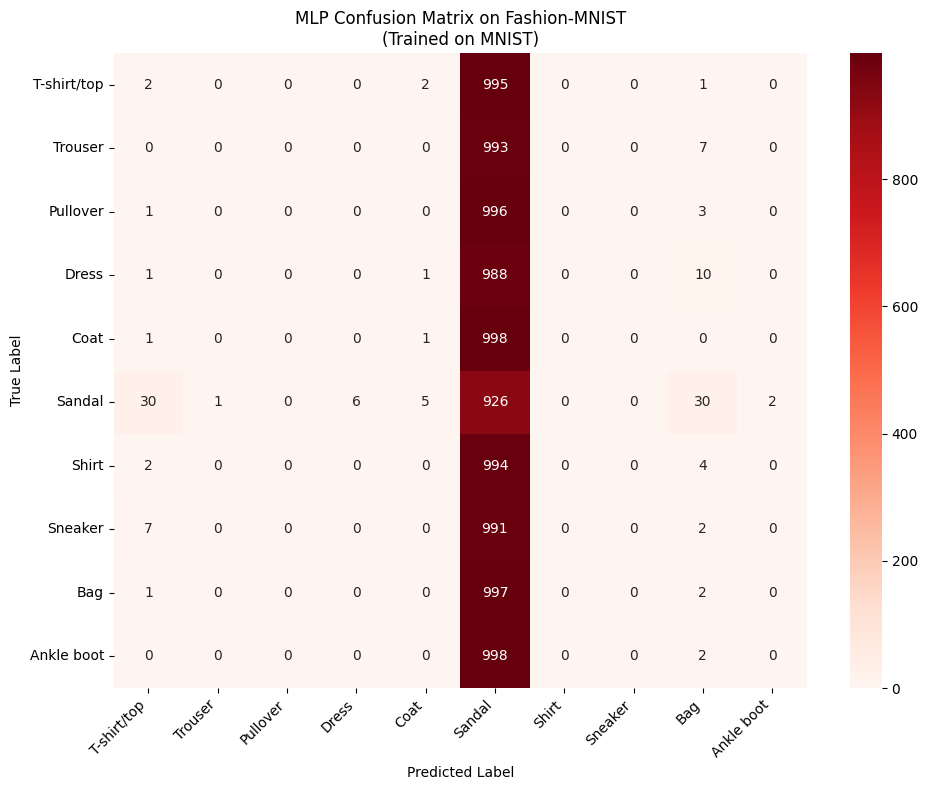

In [30]:
print("Testing MLP trained on MNIST with Fashion-MNIST data...")
fashion_pred_probs = mlp_model.predict(X_fashion_test_flat, verbose=0)
fashion_pred = np.argmax(fashion_pred_probs, axis=1)

fashion_accuracy = accuracy_score(y_fashion_test, fashion_pred)
fashion_f1 = f1_score(y_fashion_test, fashion_pred, average='weighted')

print(f"\nMLP on Fashion-MNIST:")
print(f"Accuracy: {fashion_accuracy:.4f}")
print(f"F1-Score: {fashion_f1:.4f}")

# Confusion matrix for Fashion-MNIST
cm_fashion = confusion_matrix(y_fashion_test, fashion_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_fashion, annot=True, fmt='d', cmap='Reds',
            xticklabels=fashion_class_names, yticklabels=fashion_class_names)
plt.title('MLP Confusion Matrix on Fashion-MNIST\n(Trained on MNIST)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Extract Fashion-MNIST Embeddings and Compare t-SNE

Extracting embeddings for Fashion-MNIST...
Computing t-SNE for Fashion-MNIST embeddings...


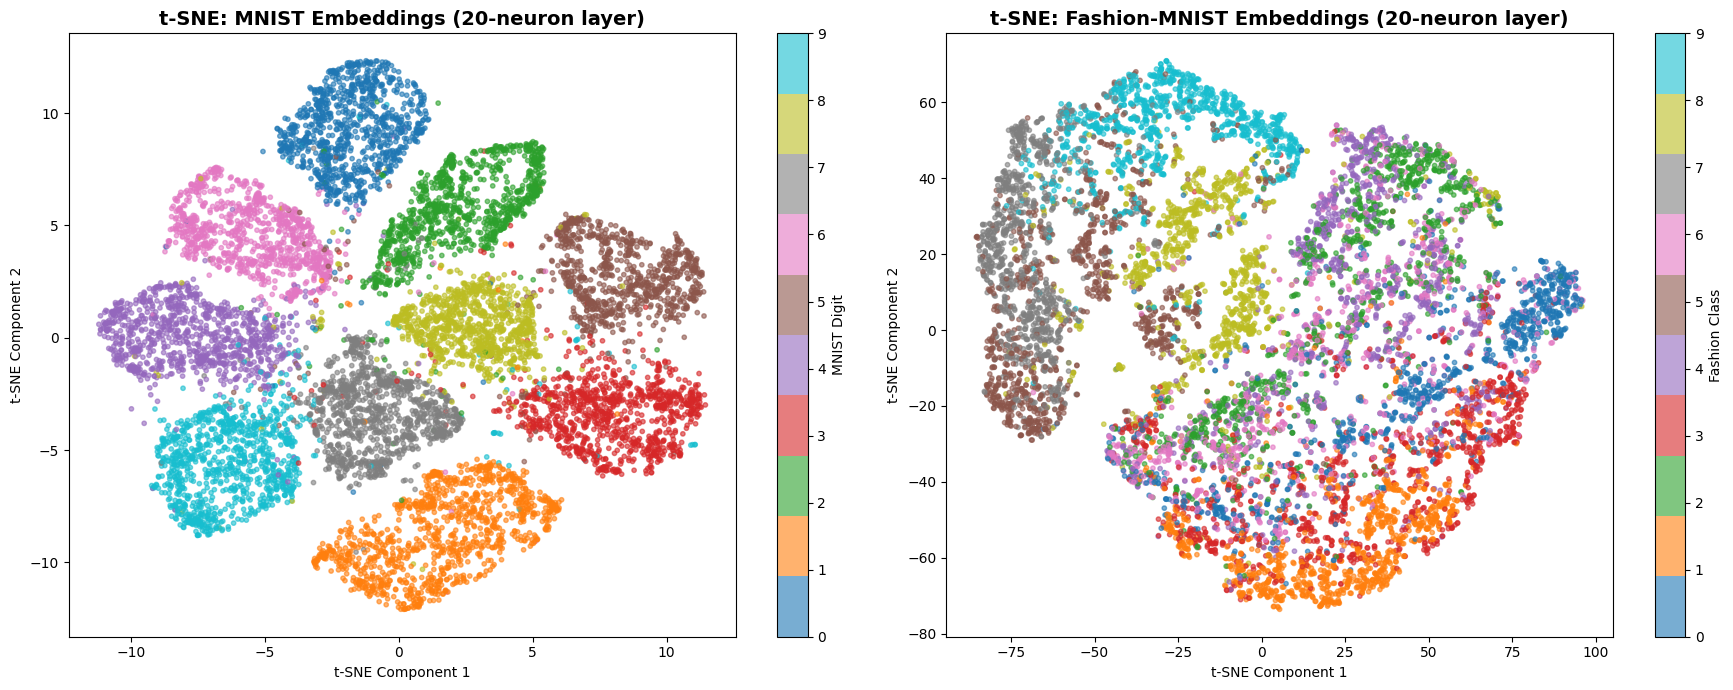


Observations:
- MNIST: Well-separated clusters (model trained on this domain)
- Fashion-MNIST: Poor cluster separation, overlapping clusters
- The MLP learned MNIST-specific features that don't generalize to Fashion-MNIST


In [31]:
print("Extracting embeddings for Fashion-MNIST...")
embeddings_fashion = embedding_model_trained.predict(X_fashion_test_flat, verbose=0)

print("Computing t-SNE for Fashion-MNIST embeddings...")
tsne_fashion = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d_fashion = tsne_fashion.fit_transform(embeddings_fashion)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# MNIST embeddings
scatter1 = ax1.scatter(embeddings_2d_trained[:, 0], embeddings_2d_trained[:, 1],
                       c=y_test, cmap='tab10', alpha=0.6, s=10)
ax1.set_title('t-SNE: MNIST Embeddings (20-neuron layer)', fontsize=14, fontweight='bold')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=range(10))
cbar1.set_label('MNIST Digit')

# Fashion-MNIST embeddings
scatter2 = ax2.scatter(embeddings_2d_fashion[:, 0], embeddings_2d_fashion[:, 1],
                       c=y_fashion_test, cmap='tab10', alpha=0.6, s=10)
ax2.set_title('t-SNE: Fashion-MNIST Embeddings (20-neuron layer)', fontsize=14, fontweight='bold')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
cbar2 = plt.colorbar(scatter2, ax=ax2, ticks=range(10))
cbar2.set_label('Fashion Class')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- MNIST: Well-separated clusters (model trained on this domain)")
print("- Fashion-MNIST: Poor cluster separation, overlapping clusters")
print("- The MLP learned MNIST-specific features that don't generalize to Fashion-MNIST")

*3.2 Using CNN*

Build Simple CNN

In [35]:
def build_simple_cnn():
    model = keras_models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),

        layers.MaxPooling2D((2, 2), name='maxpool1'),

        layers.Flatten(),

        layers.Dense(128, activation='relu', name='fc1'),

        layers.Dense(10, activation='softmax', name='output')
    ])
    return model

simple_cnn = build_simple_cnn()
simple_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

simple_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Train Simple CNN

In [36]:
print("Training Simple CNN...")
cnn_history = simple_cnn.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

cnn_test_loss, cnn_test_acc = simple_cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"\nSimple CNN Test Accuracy: {cnn_test_acc:.4f}")

Training Simple CNN...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - accuracy: 0.8654 - loss: 0.4707 - val_accuracy: 0.9753 - val_loss: 0.0848
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.9781 - loss: 0.0786 - val_accuracy: 0.9837 - val_loss: 0.0603
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.9855 - loss: 0.0518 - val_accuracy: 0.9838 - val_loss: 0.0594
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9902 - loss: 0.0359 - val_accuracy: 0.9875 - val_loss: 0.0491
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.9930 - loss: 0.0242 - val_accuracy: 0.9862 - val_loss: 0.0529
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9940 - loss: 0.0200 - val_accuracy: 0.9892 - val_loss: 0.0433
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9962 - loss: 0.0142 - val_accuracy: 0.9867 - val_loss: 0.0593
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0

Plot CNN Training History

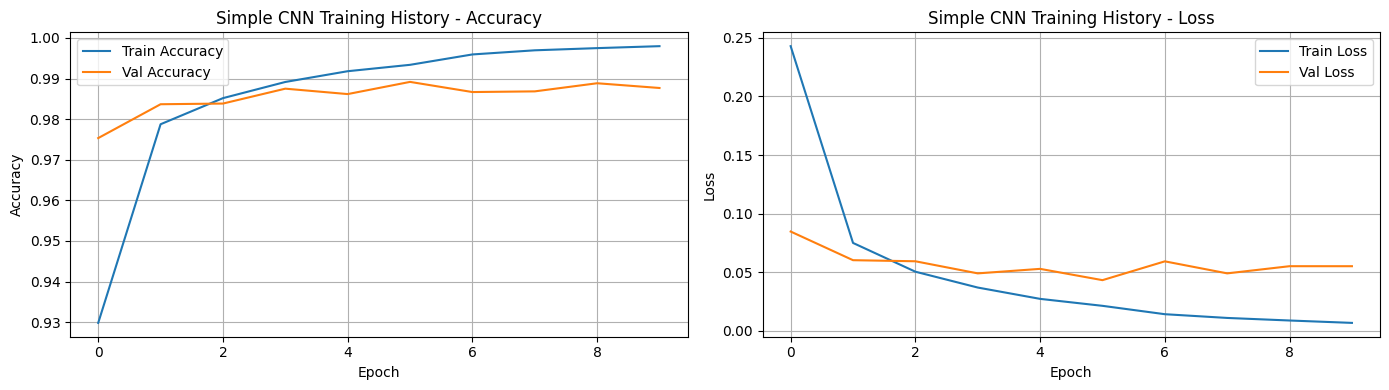

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(cnn_history.history['accuracy'], label='Train Accuracy')
ax1.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Simple CNN Training History - Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(cnn_history.history['loss'], label='Train Loss')
ax2.plot(cnn_history.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Simple CNN Training History - Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Load Pretrained CNN - MobileNetV2

In [39]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

X_train_mobilenet = np.repeat(X_train_cnn, 3, axis=-1)
X_test_mobilenet = np.repeat(X_test_cnn, 3, axis=-1)

X_train_mobilenet_resized = tf.image.resize(X_train_mobilenet, [32, 32]).numpy()
X_test_mobilenet_resized = tf.image.resize(X_test_mobilenet, [32, 32]).numpy()

X_train_mobilenet_preprocessed = mobilenet_preprocess(X_train_mobilenet_resized * 255)
X_test_mobilenet_preprocessed = mobilenet_preprocess(X_test_mobilenet_resized * 255)

base_mobilenet = MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze base model
base_mobilenet.trainable = False

# Add classification head
mobilenet_model = keras.models.Sequential([
    base_mobilenet,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

mobilenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("MobileNetV2 Model:")
mobilenet_model.summary()

MobileNetV2 Model:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train MobileNetV2

In [40]:
print("Training MobileNetV2...")
mobilenet_history = mobilenet_model.fit(
    X_train_mobilenet_preprocessed, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(
    X_test_mobilenet_preprocessed, y_test_cat, verbose=0
)
print(f"\nMobileNetV2 Test Accuracy: {mobilenet_test_acc:.4f}")

Training MobileNetV2...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 107ms/step - accuracy: 0.4593 - loss: 1.7103 - val_accuracy: 0.6153 - val_loss: 1.1402
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.5997 - loss: 1.1745 - val_accuracy: 0.6327 - val_loss: 1.0553
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.6186 - loss: 1.0946 - val_accuracy: 0.6400 - val_loss: 1.0157
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.6335 - loss: 1.0587 - val_accuracy: 0.6478 - val_loss: 0.9850
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.6395 - loss: 1.0319 - val_accuracy: 0.6517 - val_loss: 0.9702

MobileNetV2 Test Accuracy: 0.6544


Load Pretrained CNN - EfficientNetB0

In [42]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

X_train_efficientnet = np.repeat(X_train_cnn, 3, axis=-1)
X_test_efficientnet = np.repeat(X_test_cnn, 3, axis=-1)

X_train_efficientnet_resized = tf.image.resize(X_train_efficientnet, [32, 32]).numpy()
X_test_efficientnet_resized = tf.image.resize(X_test_efficientnet, [32, 32]).numpy()

X_train_efficientnet_preprocessed = efficientnet_preprocess(X_train_efficientnet_resized * 255)
X_test_efficientnet_preprocessed = efficientnet_preprocess(X_test_efficientnet_resized * 255)

base_efficientnet = EfficientNetB0(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze base model
base_efficientnet.trainable = False

# Add classification head
efficientnet_model = keras.models.Sequential([
    base_efficientnet,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("EfficientNetB0 Model:")
efficientnet_model.summary()

EfficientNetB0 Model:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Train EfficientNetB0

In [43]:
print("Training EfficientNetB0...")
efficientnet_history = efficientnet_model.fit(
    X_train_efficientnet_preprocessed, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

efficientnet_test_loss, efficientnet_test_acc = efficientnet_model.evaluate(
    X_test_efficientnet_preprocessed, y_test_cat, verbose=0
)
print(f"\nEfficientNetB0 Test Accuracy: {efficientnet_test_acc:.4f}")

Training EfficientNetB0...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 95s 197ms/step - accuracy: 0.4930 - loss: 1.4603 - val_accuracy: 0.8317 - val_loss: 0.5769
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.7592 - loss: 0.7360 - val_accuracy: 0.8722 - val_loss: 0.4076
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 191ms/step - accuracy: 0.8047 - loss: 0.5939 - val_accuracy: 0.8850 - val_loss: 0.3572
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 180ms/step - accuracy: 0.8278 - loss: 0.5241 - val_accuracy: 0.9025 - val_loss: 0.3144
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 75s 178ms/step - accuracy: 0.8409 - loss: 0.4855 - val_accuracy: 0.8982 - val_loss: 0.3043

EfficientNetB0 Test Accuracy: 0.8936


CNN Predictions and Metrics

In [44]:
print("Computing predictions for all CNN models...")

simple_cnn_pred_probs = simple_cnn.predict(X_test_cnn, verbose=0)
simple_cnn_pred = np.argmax(simple_cnn_pred_probs, axis=1)

mobilenet_pred_probs = mobilenet_model.predict(X_test_mobilenet_preprocessed, verbose=0)
mobilenet_pred = np.argmax(mobilenet_pred_probs, axis=1)

efficientnet_pred_probs = efficientnet_model.predict(X_test_efficientnet_preprocessed, verbose=0)
efficientnet_pred = np.argmax(efficientnet_pred_probs, axis=1)

simple_cnn_acc = accuracy_score(y_test, simple_cnn_pred)
simple_cnn_f1 = f1_score(y_test, simple_cnn_pred, average='weighted')

mobilenet_acc = accuracy_score(y_test, mobilenet_pred)
mobilenet_f1 = f1_score(y_test, mobilenet_pred, average='weighted')

efficientnet_acc = accuracy_score(y_test, efficientnet_pred)
efficientnet_f1 = f1_score(y_test, efficientnet_pred, average='weighted')

print(f"\nSimple CNN - Accuracy: {simple_cnn_acc:.4f}, F1-Score: {simple_cnn_f1:.4f}")
print(f"MobileNetV2 - Accuracy: {mobilenet_acc:.4f}, F1-Score: {mobilenet_f1:.4f}")
print(f"EfficientNetB0 - Accuracy: {efficientnet_acc:.4f}, F1-Score: {efficientnet_f1:.4f}")

Computing predictions for all CNN models...

Simple CNN - Accuracy: 0.9856, F1-Score: 0.9856
MobileNetV2 - Accuracy: 0.6544, F1-Score: 0.6464
EfficientNetB0 - Accuracy: 0.8936, F1-Score: 0.8936


CNN Confusion Matrices

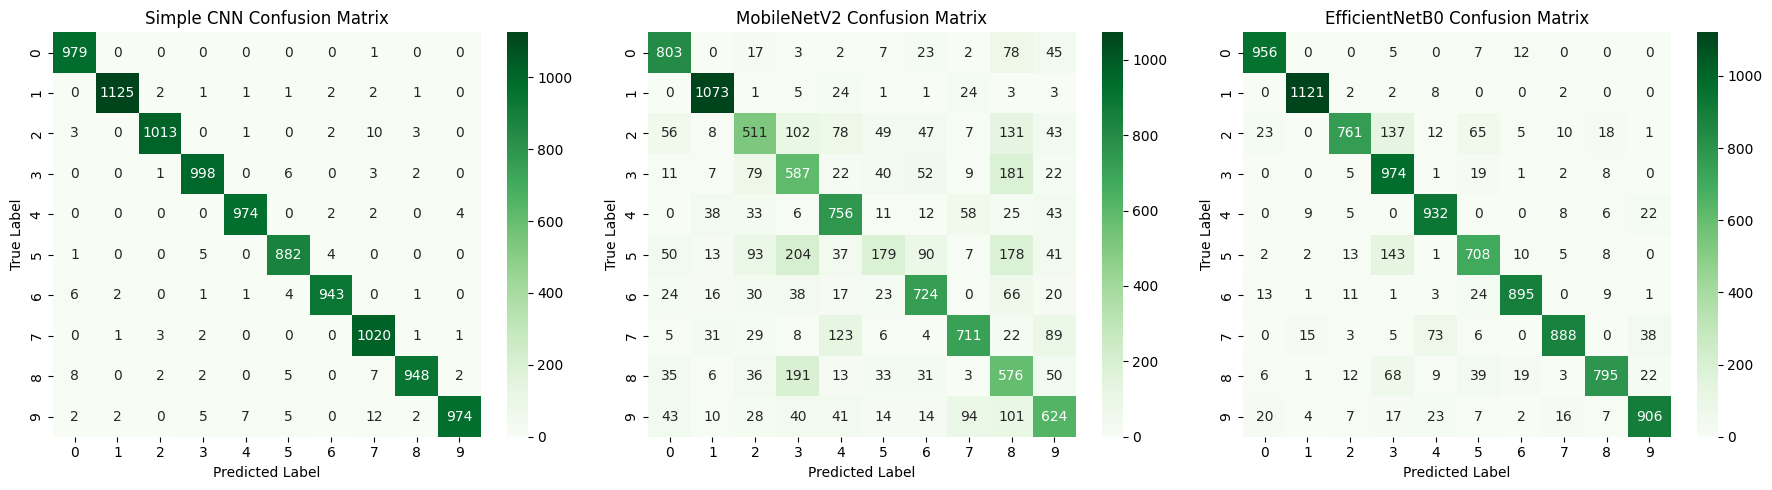

In [45]:
cm_simple_cnn = confusion_matrix(y_test, simple_cnn_pred)
cm_mobilenet = confusion_matrix(y_test, mobilenet_pred)
cm_efficientnet = confusion_matrix(y_test, efficientnet_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cnn_models_cm = [
    ('Simple CNN', cm_simple_cnn),
    ('MobileNetV2', cm_mobilenet),
    ('EfficientNetB0', cm_efficientnet)
]

for ax, (name, cm) in zip(axes, cnn_models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax, cbar=True)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

Model Size Comparison


MODEL SIZE COMPARISON
         Model  Total Parameters  Trainable Parameters
           MLP             24380                 24380
    Simple CNN            693962                693962
   MobileNetV2           2423242                165258
EfficientNetB0           4214829                165258


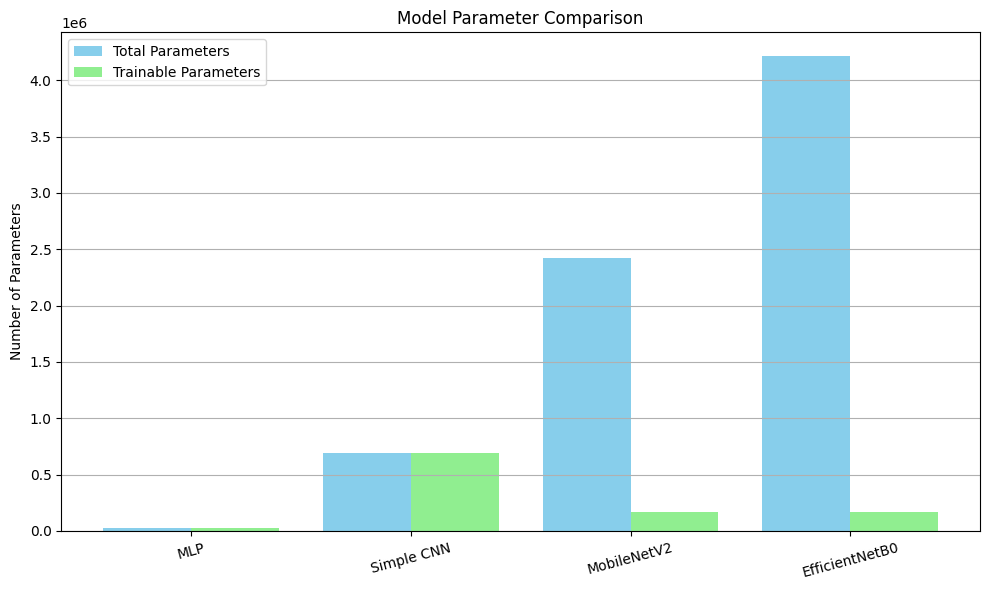

In [46]:
def count_parameters(model):
    trainable = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    total = trainable + non_trainable
    return int(total), int(trainable)

mlp_total_params, mlp_trainable_params = count_parameters(mlp_model)
simple_cnn_total_params, simple_cnn_trainable_params = count_parameters(simple_cnn)
mobilenet_total_params, mobilenet_trainable_params = count_parameters(mobilenet_model)
efficientnet_total_params, efficientnet_trainable_params = count_parameters(efficientnet_model)

model_size_comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Simple CNN', 'MobileNetV2', 'EfficientNetB0'],
    'Total Parameters': [mlp_total_params, simple_cnn_total_params, mobilenet_total_params, efficientnet_total_params],
    'Trainable Parameters': [mlp_trainable_params, simple_cnn_trainable_params, mobilenet_trainable_params, efficientnet_trainable_params]
})

print("\n" + "="*60)
print("MODEL SIZE COMPARISON")
print("="*60)
print(model_size_comparison_df.to_string(index=False))
print("="*60)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

models = model_size_comparison_df['Model']
x_pos = np.arange(len(models))

ax.bar(x_pos - 0.2, model_size_comparison_df['Total Parameters'], 0.4, label='Total Parameters', color='skyblue')
ax.bar(x_pos + 0.2, model_size_comparison_df['Trainable Parameters'], 0.4, label='Trainable Parameters', color='lightgreen')

ax.set_ylabel('Number of Parameters')
ax.set_title('Model Parameter Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()